<a href="https://colab.research.google.com/github/HuyNguyen271/Bai_tap_tuan_01/blob/main/fuzzy_DCmotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1f6facf39b93f6daa58792244c923af7796340d81ce1b51ff312b11934b16e7a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


93.07239170020853


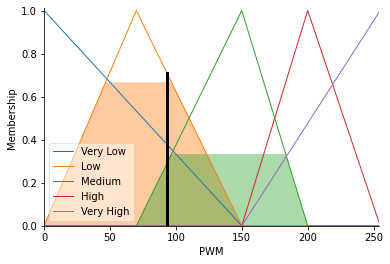

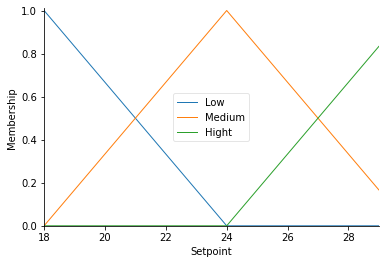

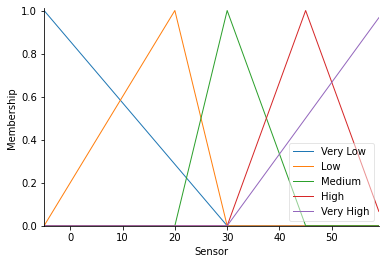

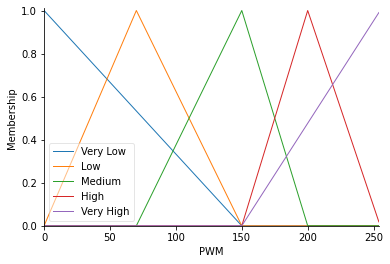

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
# Tao khoang data
sp = ctrl.Antecedent(np.arange(18,30,1),'Setpoint') # input khoang dau vao
ss = ctrl.Antecedent(np.arange(-5,60,1),'Sensor')
pwm = ctrl.Consequent(np.arange(0,255,1),'PWM') # output khoang dau ra




#sp
sp['Low']=fuzz.trimf(sp.universe,[18,18,24])      
sp['Medium']=fuzz.trimf(sp.universe,[18,24,30])   #tam giac
sp['Hight']=fuzz.trimf(sp.universe,[24,30,30])

#ss
ss['Very Low']=fuzz.trimf(ss.universe,[-5,-5,30])  
ss['Low']=fuzz.trimf(ss.universe,[-5,20,30])  
ss['Medium']=fuzz.trimf(ss.universe,[20,30,45])  
ss['High']=fuzz.trimf(ss.universe,[30,45,60])  
ss['Very High']=fuzz.trimf(ss.universe,[30,60,60])  

#pwm
pwm['Very Low']=fuzz.trimf(pwm.universe,[0,0,150])  
pwm['Low']=fuzz.trimf(pwm.universe,[0,70,150])  
pwm['Medium']=fuzz.trimf(pwm.universe,[70,150,200])  
pwm['High']=fuzz.trimf(pwm.universe,[150,200,255])  
pwm['Very High']=fuzz.trimf(pwm.universe,[150,255,255])  

rule1 =ctrl.Rule(sp['Low'] & ss['Very Low'],pwm['Very Low'])
rule2 =ctrl.Rule(sp['Low'] & ss['Low'],pwm['Low']) # tao luat
rule3 =ctrl.Rule(sp['Low'] & ss['Medium'],pwm['Low'])
rule4 =ctrl.Rule(sp['Low'] & ss['High'],pwm['Medium'])
rule5 =ctrl.Rule(sp['Low'] & ss['Very High'],pwm['High'])

rule6 =ctrl.Rule(sp['Medium'] & ss['Very Low'],pwm['Low'])
rule7 =ctrl.Rule(sp['Medium'] & ss['Low'],pwm['Low'])
rule8 =ctrl.Rule(sp['Medium'] & ss['Medium'],pwm['Medium'])
rule9 =ctrl.Rule(sp['Medium'] & ss['High'],pwm['High'])
rule10 =ctrl.Rule(sp['Medium'] & ss['Very High'],pwm['Very High'])

rule11 =ctrl.Rule(sp['Hight'] & ss['Very Low'],pwm['Medium'])
rule12 =ctrl.Rule(sp['Hight'] & ss['Low'],pwm['Medium'])
rule13 =ctrl.Rule(sp['Hight'] & ss['Medium'],pwm['High'])
rule14 =ctrl.Rule(sp['Hight'] & ss['High'],pwm['High'])
rule15 =ctrl.Rule(sp['Hight'] & ss['Very High'],pwm['Very High'])

tiping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15]) # dua vao 
tipping = ctrl.ControlSystemSimulation(tiping_ctrl)
#input data
tipping.input['Setpoint'] = 20
tipping.input['Sensor'] = 30

tipping.compute()

print(tipping.output['PWM'])
pwm.view(sim=tipping)

sp.view()
ss.view()
pwm.view()

# food['poor'].view()

106.30561940356878
151.31447735683042


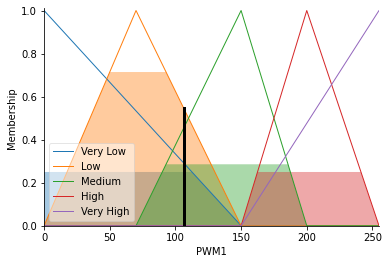

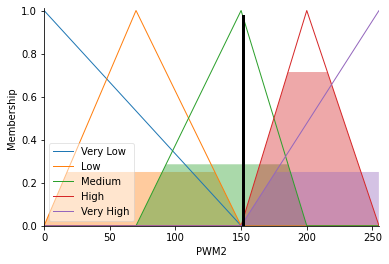

In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl

# Tao khoang data
l = ctrl.Antecedent(np.arange(0,1.5,0.1),'Left') # input khoang dau vao
c = ctrl.Antecedent(np.arange(0,1.5,0.1),'Center')
r = ctrl.Antecedent(np.arange(0,1.5,0.1),'Right')
lc = ctrl.Consequent(np.arange(0,90,0.1),'LC') # output khoang dau ra
cr = ctrl.Consequent(np.arange(-90,0,0.1),'CR') # output khoang dau ra

pwm1 = ctrl.Consequent(np.arange(0,255,0.1),'PWM1') # pwm left 
pwm2 = ctrl.Consequent(np.arange(0,255,0.1),'PWM2') # pwm Right



#l
l['Near']=fuzz.trimf(l.universe,[0,0,0.8])      
l['Medium']=fuzz.trimf(l.universe,[0,0.8,1.5])   #tam giac
l['Far']=fuzz.trimf(l.universe,[0.8,1.5,1.5])

#c
c['Near']=fuzz.trimf(c.universe,[0,0,0.8])      
c['Medium']=fuzz.trimf(c.universe,[0,0.8,1.5])   #tam giac
c['Far']=fuzz.trimf(c.universe,[0.8,1.5,1.5])

#LC
lc['Low']=fuzz.trimf(lc.universe,[0,0,45])  
lc['Medium']=fuzz.trimf(lc.universe,[0,45,90])  
lc['High']=fuzz.trimf(lc.universe,[45,90,90])  

#r
r['Near']=fuzz.trimf(r.universe,[0,0,0.8])      
r['Medium']=fuzz.trimf(r.universe,[0,0.8,1.5])   #tam giac
r['Far']=fuzz.trimf(r.universe,[0.8,1.5,1.5])

#CR
cr['Low']=fuzz.trimf(cr.universe,[-90,-90,-45])  
cr['Medium']=fuzz.trimf(cr.universe,[-90,-45,0])  
cr['High']=fuzz.trimf(cr.universe,[-45,0,0]) 

#pwm1
pwm1['Very Low']=fuzz.trimf(pwm1.universe,[0,0,150])  
pwm1['Low']=fuzz.trimf(pwm1.universe,[0,70,150])  
pwm1['Medium']=fuzz.trimf(pwm1.universe,[70,150,200])  
pwm1['High']=fuzz.trimf(pwm1.universe,[150,200,255])  
pwm1['Very High']=fuzz.trimf(pwm1.universe,[150,255,255]) 

#pwm2
pwm2['Very Low']=fuzz.trimf(pwm2.universe,[0,0,150])  
pwm2['Low']=fuzz.trimf(pwm2.universe,[0,70,150])  
pwm2['Medium']=fuzz.trimf(pwm2.universe,[70,150,200])  
pwm2['High']=fuzz.trimf(pwm2.universe,[150,200,255])  
pwm2['Very High']=fuzz.trimf(pwm2.universe,[150,255,255]) 


rule1 =ctrl.Rule(l['Near'] & c['Near'],lc['High'])
rule2 =ctrl.Rule(l['Near'] & c['Medium'],lc['High']) # tao luat
rule3 =ctrl.Rule(l['Near'] & c['Far'],lc['Medium'])

rule4 =ctrl.Rule(l['Medium'] & c['Near'],lc['High'])
rule5 =ctrl.Rule(l['Medium'] & c['Medium'],lc['Medium'])
rule6 =ctrl.Rule(l['Medium'] & c['Far'],lc['Medium'])

rule7 =ctrl.Rule(l['Far'] & c['Near'],lc['Medium'])
rule8 =ctrl.Rule(l['Far'] & c['Medium'],lc['Low'])
rule9 =ctrl.Rule(l['Far'] & c['Far'],lc['Low'])
#/////////
rule10 =ctrl.Rule(r['Near'] & c['Near'],cr['Low'])
rule11 =ctrl.Rule(r['Near'] & c['Medium'],cr['Low']) # tao luat
rule12 =ctrl.Rule(r['Near'] & c['Far'],cr['Medium'])

rule13 =ctrl.Rule(r['Medium'] & c['Near'],cr['Low'])
rule14 =ctrl.Rule(r['Medium'] & c['Medium'],cr['Medium'])
rule15 =ctrl.Rule(r['Medium'] & c['Far'],cr['Medium'])

rule16 =ctrl.Rule(r['Far'] & c['Near'],cr['Medium'])
rule17 =ctrl.Rule(r['Far'] & c['Medium'],cr['High'])
rule18 =ctrl.Rule(r['Far'] & c['Far'],cr['High'])

#////////////
rule19 =ctrl.Rule(lc['Low'] & cr['Low'],pwm1['Very High'])
rule20 =ctrl.Rule(lc['Low'] & cr['Medium'],pwm1['Very High']) # tao luat
rule21 =ctrl.Rule(lc['Low'] & cr['High'],pwm1['High'])

rule22 =ctrl.Rule(lc['Medium'] & cr['Low'],pwm1['High'])
rule23 =ctrl.Rule(lc['Medium'] & cr['Medium'],pwm1['Medium'])
rule24 =ctrl.Rule(lc['Medium'] & cr['High'],pwm1['Low'])

rule25 =ctrl.Rule(lc['High'] & cr['Low'],pwm1['Medium'])
rule26 =ctrl.Rule(lc['High'] & cr['Medium'],pwm1['Low'])
rule27 =ctrl.Rule(lc['High'] & cr['High'],pwm1['Very Low'])

# //////////
rule28 =ctrl.Rule(lc['Low'] & cr['Low'],pwm2['Very Low'])
rule29 =ctrl.Rule(lc['Low'] & cr['Medium'],pwm2['Low']) # tao luat
rule30 =ctrl.Rule(lc['Low'] & cr['High'],pwm2['Medium'])

rule31 =ctrl.Rule(lc['Medium'] & cr['Low'],pwm2['Low'])
rule32 =ctrl.Rule(lc['Medium'] & cr['Medium'],pwm2['Medium'])
rule33 =ctrl.Rule(lc['Medium'] & cr['High'],pwm2['High'])

rule34 =ctrl.Rule(lc['High'] & cr['Low'],pwm2['Medium'])
rule35 =ctrl.Rule(lc['High'] & cr['Medium'],pwm2['High'])
rule36 =ctrl.Rule(lc['High'] & cr['High'],pwm2['Very High'])



#////////////////

cr_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,
                      rule10,rule11,rule12,rule13,rule14,rule15,rule16,
                      rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,
                      rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36]) # dua vao 
cring = ctrl.ControlSystemSimulation(cr_ctrl)
#input data
cring.input['Right'] = 1.3
cring.input['Center'] = 0.2
cring.input['Left'] = 0.2
cring.compute()

print(cring.output['PWM1'])
print(cring.output['PWM2'])
pwm1.view(sim=cring)
pwm2.view(sim=cring)

# /

# cr_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8.rule9,
#                               rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18]) # dua vao 
# cring = ctrl.ControlSystemSimulation(cr_ctrl)
# #input data
# cring.input['Right'] = 0.2
# cring.input['Center'] = 0.1

# cring.compute()

# print(cring.output['CR'])
# cr.view(sim=cring)

# sp.view()
# ss.view()
# pwm.view()

# food['poor'].view()

